# Visualising the DWD climate data

This jupyter-notebook uses the data provided by the German Weather Service (DWD). The data can be found on the climate data center (https://cdc.dwd.de/portal/) and is subject to the Creative Commons BY 4.0 Licence (CC BY 4.0). 

This notebook is meant for personal use, for example to learn how to retrieve the data from the climate data center, and how to visualize it.

## 1. Retrieving the data

This data analysis focuses on the observations in Germany. The data are provided in the folder linked [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/), which contains different time resolutions from minutes to days, and months. For now, the analysis will focus on the [monthly data](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/). 

The monthly data is divided in historical and recent data. The historical data is updated annually and is quality controlled. The recent data is updated on a monthly basis but has not been quality controlled. For more details on the different parameters and their units, DWD provides a detailed description in the folder. 

The station name and the URL of the data on the CDC will be defined in the second code cell below and has the following syntax. 
```
hist_url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/monatswerte_KL_01420_19350701_20231231_hist.zip"
recent_url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/recent/monatswerte_KL_01420_akt.zip"
station = "Frankfurt"
```
This can be adapted according to the station of interest. Please note, that the URLs need to be updated as well as the name of the measurement station. The station name is used for the titles of the figures. 

Before the data analysis begins, the python packages need to be imported. All listed python modules in the next cell need to be installed in order to be able to run the code.

In [1]:
# loading the python packages 
import os
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
from datetime import datetime, timedelta
from dateutil import relativedelta
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# change the URLs and station name according to the data that should be visualized
# in this example, the data from Frankfurt am Main is used (Station ID 01420)
hist_url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/monatswerte_KL_01420_19350701_20231231_hist.zip"
recent_url = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/recent/monatswerte_KL_01420_akt.zip"
station = "Frankfurt"

The next step is to check, which files are inside the provided .zip file and choose the correct one for further analysis. 

The content of the zip files is displayed below. The data needed for the analysis is stored in a file called produkt_klima_monat_YYYYMMDD_YYYYMMDD_StationID.txt and contains the information of the start of the dataset, the end of the dataset and the station ID. 

Then, the data stored in the txt files are read and transformed into pandas dataframes.

In [3]:
# open the URL: 
rec = urlopen(recent_url)
hist = urlopen(hist_url)
zipfile_hist = ZipFile(BytesIO(hist.read()))
zipfile_rec = ZipFile(BytesIO(rec.read()))

display("Zip file content historical: ", zipfile_hist.namelist())
display("Zip file content recent: ", zipfile_rec.namelist())

'Zip file content historical: '

['Metadaten_Stationsname_Betreibername_01420.html',
 'Metadaten_Stationsname_Betreibername_01420.txt',
 'Metadaten_Parameter_klima_monat_01420.html',
 'Metadaten_Parameter_klima_monat_01420.txt',
 'Metadaten_Geraete_Bedeckungsgrad_01420.html',
 'Metadaten_Geraete_Bedeckungsgrad_01420.txt',
 'Metadaten_Geraete_Lufttemperatur_01420.html',
 'Metadaten_Geraete_Lufttemperatur_01420.txt',
 'Metadaten_Geraete_Lufttemperatur_Maximum_01420.html',
 'Metadaten_Geraete_Lufttemperatur_Maximum_01420.txt',
 'Metadaten_Geraete_Lufttemperatur_Minimum_01420.html',
 'Metadaten_Geraete_Lufttemperatur_Minimum_01420.txt',
 'Metadaten_Geraete_Niederschlagshoehe_01420.html',
 'Metadaten_Geraete_Niederschlagshoehe_01420.txt',
 'Metadaten_Geraete_Sonnenscheindauer_01420.html',
 'Metadaten_Geraete_Sonnenscheindauer_01420.txt',
 'Metadaten_Geographie_01420.txt',
 'Metadaten_Fehldaten_01420_19350701_20231231.html',
 'Metadaten_Fehldaten_01420_19350701_20231231.txt',
 'Metadaten_Fehlwerte_01420_19350701_20231231.tx

'Zip file content recent: '

['Metadaten_Stationsname_Betreibername_01420.html',
 'Metadaten_Stationsname_Betreibername_01420.txt',
 'Metadaten_Parameter_klima_monat_01420.html',
 'Metadaten_Parameter_klima_monat_01420.txt',
 'Metadaten_Geraete_Bedeckungsgrad_01420.html',
 'Metadaten_Geraete_Bedeckungsgrad_01420.txt',
 'Metadaten_Geraete_Lufttemperatur_01420.html',
 'Metadaten_Geraete_Lufttemperatur_01420.txt',
 'Metadaten_Geraete_Lufttemperatur_Maximum_01420.html',
 'Metadaten_Geraete_Lufttemperatur_Maximum_01420.txt',
 'Metadaten_Geraete_Lufttemperatur_Minimum_01420.html',
 'Metadaten_Geraete_Lufttemperatur_Minimum_01420.txt',
 'Metadaten_Geraete_Niederschlagshoehe_01420.html',
 'Metadaten_Geraete_Niederschlagshoehe_01420.txt',
 'Metadaten_Geraete_Sonnenscheindauer_01420.html',
 'Metadaten_Geraete_Sonnenscheindauer_01420.txt',
 'Metadaten_Geographie_01420.txt',
 'Metadaten_Fehldaten_01420_20230501_20241130.html',
 'Metadaten_Fehldaten_01420_20230501_20241130.txt',
 'Metadaten_Fehlwerte_01420_20230501_20241130.tx

In [5]:
# read the historical data file and save it as pandas dataframe
# retrieve the end of the data file from the filename
for name in zipfile_hist.namelist():
    if name.startswith("produkt_klima_monat"):
        df_file_hist = zipfile_hist.open(name)
        hist_df = pd.read_csv(df_file_hist, sep=";")
        print(name)
        hist_enddate = name.split("_")[4]
        print(hist_enddate)
        break

produkt_klima_monat_19350701_20231231_01420.txt
20231231


In [6]:
# read the recent datafile and save it as pandas dataframe
# retrieve the beginning of the data file from the file name
for name in zipfile_rec.namelist():
    if name.startswith("produkt_klima_monat"):
        df_file_akt = zipfile_rec.open(name)
        rec_df = pd.read_csv(df_file_akt, sep=";")
        print(name)
        rec_startdate = name.split("_")[3]
        print(rec_startdate)
        break

produkt_klima_monat_20230501_20241130_01420.txt
20230501


## 2.1 Combining historical and recent data (optional)
The historical and recent data are now stored in two dataframes. As the recent data is not yet quality controlled, one can decide if this data should be included in further analysis and visualisation. 
To combine both data sets, some months from the recent dataframe should be removed, as they overlap with the historical data. To retrieve the amount of months (and thus rows in the dataframe) that need to be removed, the overlap can be calculated from the file names, which contain the start and end date of the data

In [7]:
# convert the date-string from the data file name to datetime format: 
hist_enddate = pd.to_datetime(hist_enddate)
rec_startdate = pd.to_datetime(rec_startdate)
# calculate the difference between the two dates to get the overlap of both dataframes:
delta_files = relativedelta.relativedelta(hist_enddate,rec_startdate)
delta_months = delta_files.months

print("The dataframes overlap by ",delta_months," months")

The dataframes overlap by  7  months


In [8]:
# combine both dataframes into one: 
df = pd.concat([hist_df, rec_df[delta_months+1:]])
display(df)

STATIONS_ID  MESS_DATUM_BEGINN  MESS_DATUM_ENDE  QN_4    MO_N  MO_TT  \
0          1420           19350701         19350731     5 -999.00  20.20   
1          1420           19350801         19350831     5 -999.00  18.50   
2          1420           19350901         19350930     5 -999.00  14.70   
3          1420           19351001         19351031     5 -999.00   9.10   
4          1420           19351101         19351130     5 -999.00   5.90   
..          ...                ...              ...   ...     ...    ...   
14         1420           20240701         20240731     9    5.62  20.68   
15         1420           20240801         20240831     3    4.31  21.71   
16         1420           20240901         20240930     1    5.47  16.90   
17         1420           20241001         20241031     1    6.68  12.20   
18         1420           20241101         20241130     1    6.89   6.38   

    MO_TX  MO_TN   MO_FK  MX_TX  MX_FX  MX_TN  MO_SD_S  QN_6  MO_RR  MX_RS  \
0   26.20  13.20 -999.00 -999.0 -999.0 -999.0  -999.00  -999 -999.0 -999.0   
1   24.90  11.90 -999.00 -999.0 -999.0 -999.0  -999.00  -999 -999.0 -999.0   
2   20.10   9.70 -999.00 -999.0 -999.0 -999.0  -999.00  -999 -999.0 -999.0   
3   13.60   5.40 -999.00 -999.0 -999.0 -999.0  -999.00  -999 -999.0 -999.0   
4    8.80   3.10 -999.00 -999.0 -999.0 -999.0  -999.00  -999 -999.0 -999.0   
..    ...    ...     ...    ...    ...    ...      ...   ...    ...    ...   
14  26.67  14.55    2.39   33.6   21.9    8.7   245.60     3   54.0   19.0   
15  28.28  15.05    2.32   35.9   14.9    7.2   292.80     3   39.2   13.8   
16  21.88  12.27    2.53   33.1   16.7    2.8   162.27     1  117.5   25.0   
17  15.84   8.49    2.13   22.2   14.8    3.7    72.48     1   56.7   19.5   
18   8.80   3.51    2.43   16.8   20.1   -4.5    36.65     1 -999.0 -999.0   

    eor  
0   eor  
1   eor  
2   eor  
3   eor  
4   eor  
..  ...  
14  eor  
15  eor  
16  eor  
17  eor  
18  eor  

[1073 rows x 17 columns]

## 2.2 Alternative: only proceed with the historical data
If the recent data should not be included in the further process, the dataframe "df" can simply be defined as: 
```python
df = hist_df
```

## 3.1 Data preparation
For the further analysis and plotting, some modifications to the dataframe will be done. The index will be set to the date (beginning of the month), and additional columns will be added, e.g. for year and month, so that the data can later be pivoted for the heatmap figures.

The abbreviations of the parameters, which are the column names of the dataframe, are listed in the [description file](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/DESCRIPTION_obsgermany-climate-monthly-kl_en.pdf) in the CDC and also shown below for quick reference:

| column name       | description                                            | unit | type     | format         |
| ----------------- | ------------------------------------------------------ | ---- | -------- | -------------- |
| STATIONS_ID       | DWD station identification number                      |      | VARCHAR2 |                |
| MESS_DATUM_BEGINN | begin of interval                                      |      | NUMBER   | YYYYMMDD       | 
| MESS_DATUM_ENDE   | end of interval                                        |      | NUMBER   | YYYYMMDD       | 
| QN_4              | quality level of the data in the following columns     |      | NUMBER   | numerical code | 
| MO_N              | monthly mean of cloud cover                            | 1/8  | NUMBER   |                |
| MO_TT             | monthly mean temperature 2 m above ground              | °C   | NUMBER   |                |
| MO_TX             | monthly mean of daily temperature maxima (2 m agl)     | °C   | NUMBER   |                | 
| MO_TN             | monthly mean of daily temperature minima (2 m agl)     | °C   | NUMBER   |                |
| MO_FK             | monthly mean of daily wind speed                       | Bft  | NUMBER   |                |
| MX_TX             | monthly maximum of daily temperature maxima (2 m agl)  | °C   | NUMBER   |                |
| MX_FX             | monthly maximum of daily wind speed                    | m/s  | NUMBER   |                |
| MX_TN             | monthly minimum of daily temperature minima (2 m agl)  | °C   | NUMBER   |                |
| MO_SD_S           | monthly sum of sunshine duration                       | h    | NUMBER   |                |
| QN_6              | quality level of the data in the following columns     |      | NUMBER   | numerical code | 
| MO_RR             | monthly sum of precipitation height                    | mm   | NUMBER   |                |
| MX_RS             | monthly maximum of daily precipitation height          | mm   | NUMBER   |                |

In [9]:
# set the index as date of the datapoint (beginning of each month)
df.index = pd.to_datetime(df["MESS_DATUM_BEGINN"],format="%Y%m%d")
df.index.name = "date"

# replace missing values, defined as -999.0 in the raw data, with NaN
df = df.replace(-999.00,np.nan)
df["Year"] = df.index.year
df["Month"] = df.index.month

## 3.2 Pivoting the dataframe
In the next step, the dataframe is pivoted, so that the indices are defined by the months and the columns are defined by the years. That means that each parameter is regrouped by its year and month. The parameters that should be included in the pivoted dataframe can be defined by listing them in the df.pivot command. For months and years where no datapoint is available, the dataframe will be filled with NaN.

In [10]:
df_pivoted = df.pivot(index = "Month", columns = "Year", values = ["MO_SD_S","MO_RR","MO_N","MO_TT","MO_TN","MO_TX","MX_TX","MX_TN"])
display(df_pivoted)

MO_SD_S                                               ... MX_TN       \
Year     1935 1936 1937 1938 1939 1940 1941 1942 1943 1944  ...  2015 2016   
Month                                                       ...              
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  -4.6 -7.3   
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  -5.2 -3.1   
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  -2.5 -3.2   
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  -2.4 -1.2   
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.5  0.2   
6         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   8.1  7.1   
7         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   6.9  9.5   
8         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   9.7  6.1   
9         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   7.3  7.6   
10        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   1.0  2.8   
11        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  -2.8 -7.6   
12        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  -1.9 -5.9   

                                                      
Year   2017  2018  2019  2020  2021  2022  2023 2024  
Month                                                 
1     -12.8  -2.7 -10.3  -5.6  -7.8  -3.9  -4.7 -9.9  
2      -4.1  -9.9  -4.5  -3.9 -10.6  -5.8  -6.0 -1.9  
3      -0.1  -7.4  -2.8  -3.0  -4.7  -4.8  -4.7 -1.3  
4      -2.9  -1.2   0.5  -3.1  -3.3  -2.8  -3.0 -1.0  
5       2.1   1.7  -1.2   1.0  -1.4   3.9   4.3  5.8  
6       7.0   7.9   6.9   6.8   9.5   5.8  10.4  6.5  
7       8.8  11.7   6.7   7.6  10.6   8.3  10.2  8.7  
8       8.8   5.9  10.1  10.3   9.6  11.6   9.5  7.2  
9       4.5   2.9   4.8   5.2   4.4   3.2   5.1  2.8  
10     -1.4   0.1  -0.4   0.6  -1.1   4.0  -1.3  3.7  
11     -1.7  -1.6  -1.6  -5.7  -3.0  -0.2  -2.5 -4.5  
12     -3.9  -4.3  -4.9  -2.7  -6.3 -11.5  -4.8  NaN  

[12 rows x 720 columns]

## 4. Data visualization 
In this chapter, the data will be visualized in various ways. 
The first plots (heatmap plots) serve as an overview, like a calendar, containing each monthly datapoint over the years of measurement. The heatmap is plotted with the seaborn module, using the pivoted dataframe. In this example, each data point is written on the tile of the plot. This can be removed by setting the annot command to False, for example, when plotting larger datasets where the numbers would overlap.

The line plots will provide an overview of monthly average temperatures, the annual temperatures and the mean temperatures during the reference periods. 

## 4.1 Heatmap with seaborn

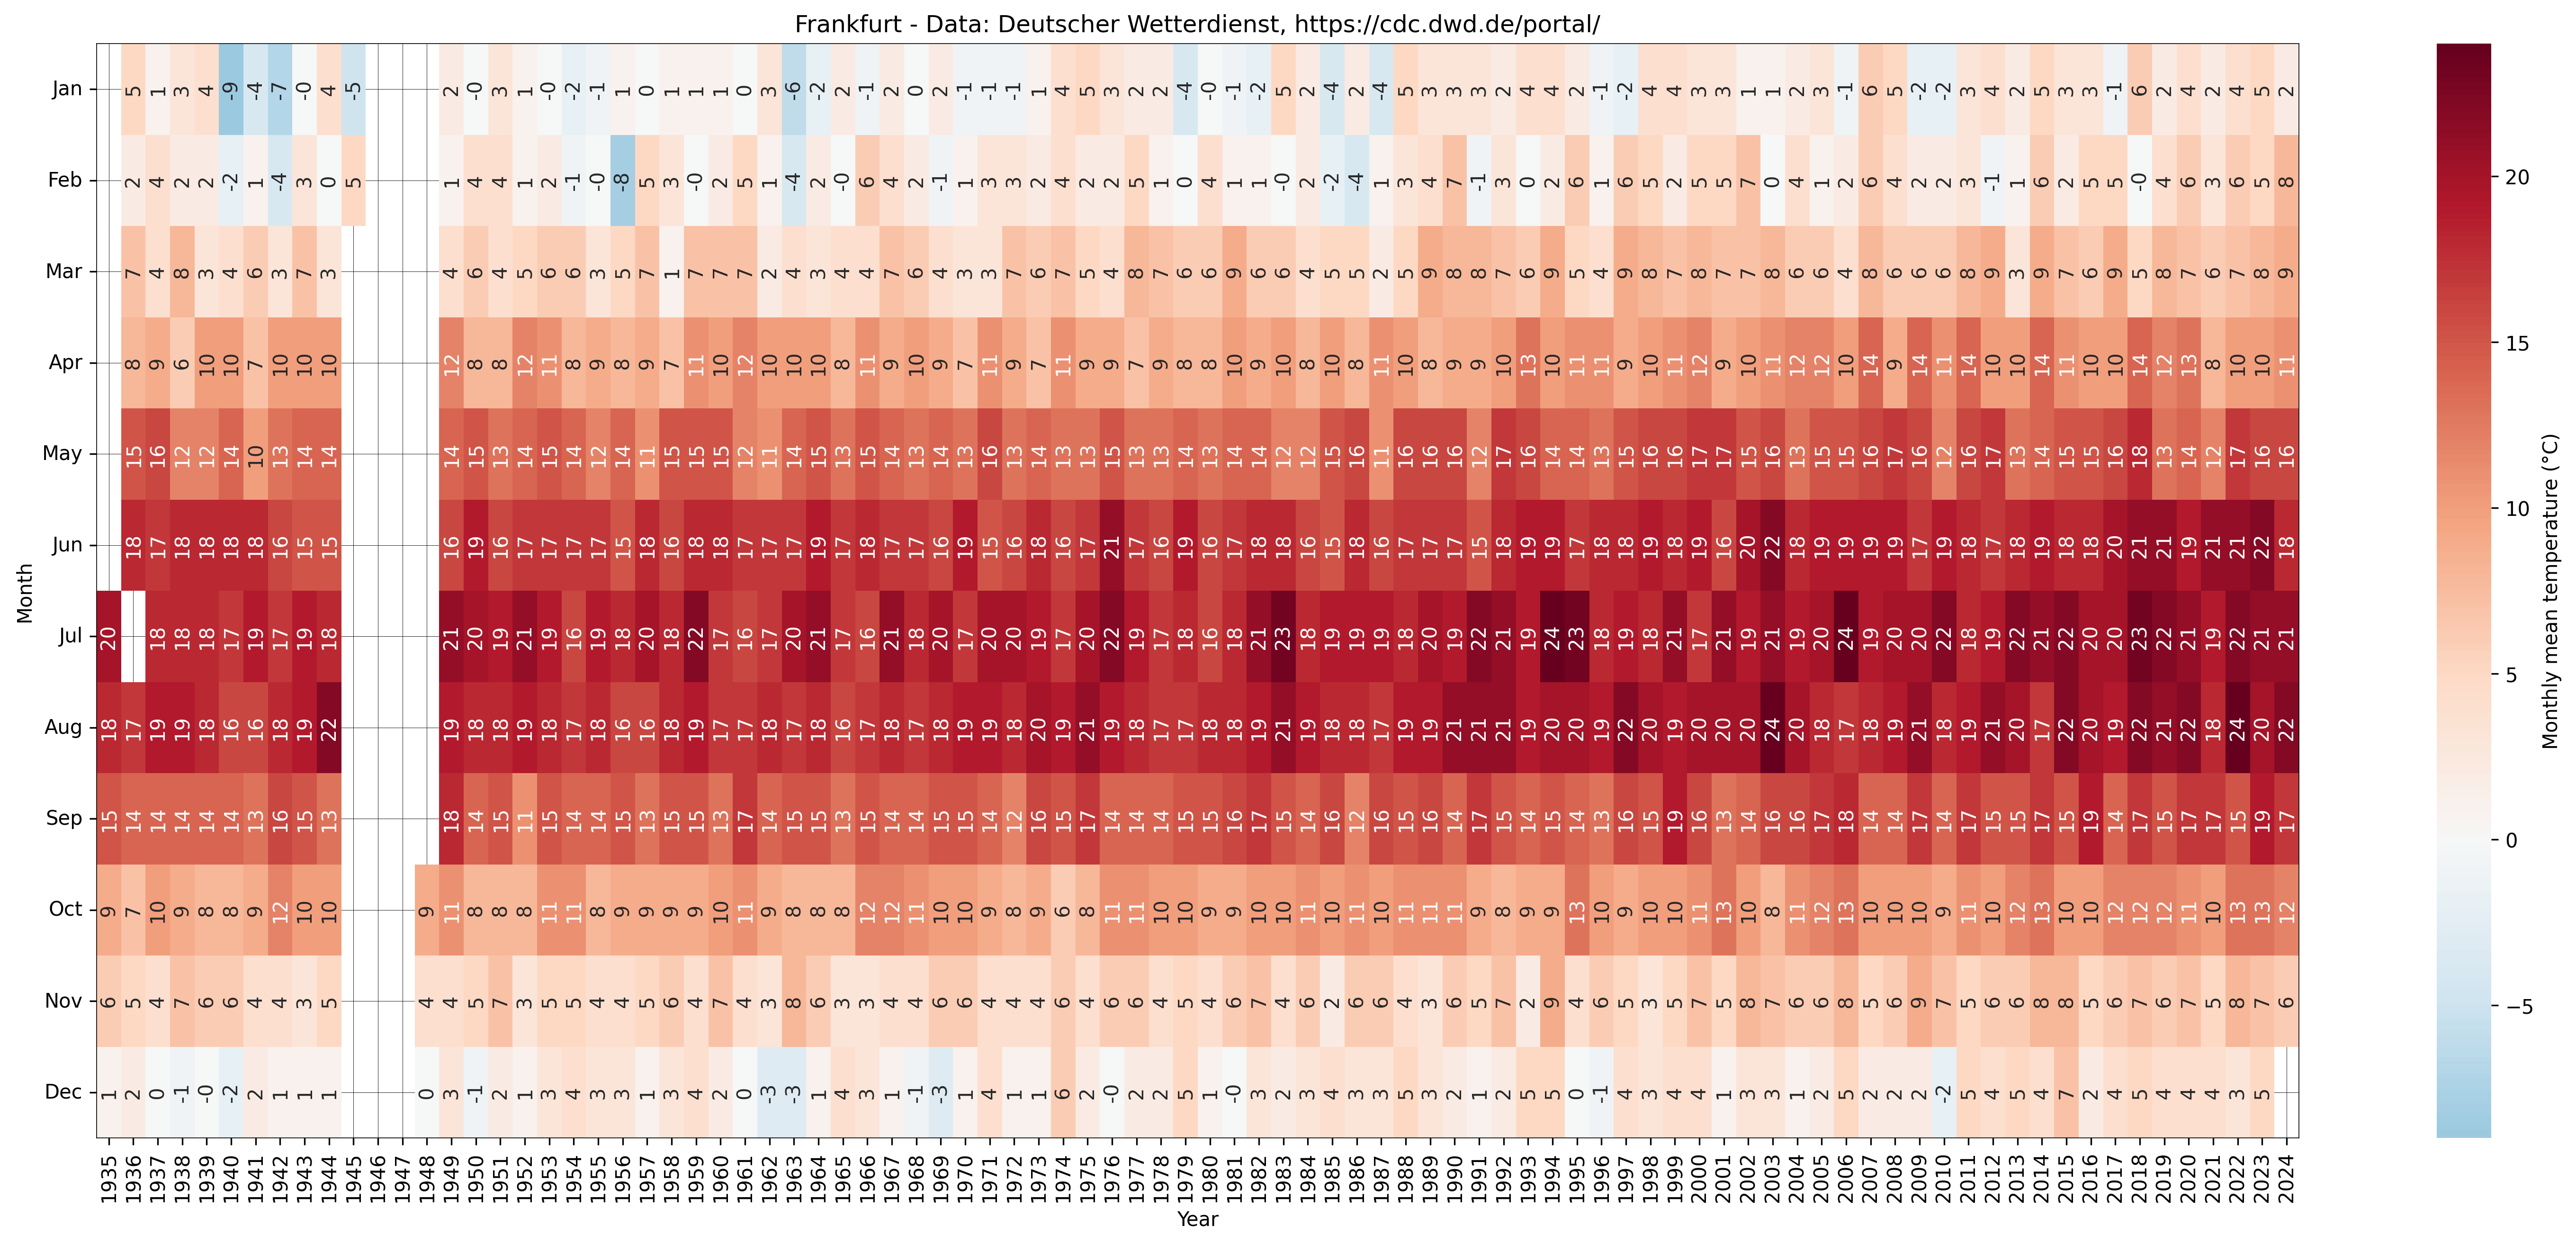

In [11]:
# heatmap monthly mean temperature
# the colorbar is chosen and set (center=0), so that temperatures below 0°C are blue and temperatures above 0°C are red
monthlabel = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig = plt.figure(figsize=(25,10),dpi=300)
annot_kws={"fontsize":10, 
           "alpha":1, 
           "rotation":"vertical",
           "verticalalignment":"center"}
ax = sns.heatmap(round(df_pivoted["MO_TT"]), annot=True,fmt=".0f",annot_kws = annot_kws,
                center=0,cmap="RdBu_r")
ax.collections[0].colorbar.set_label("Monthly mean temperature (\xb0C)")
# setting the y-axis up side down, i.e. January on top, December in the bottom, to change it to calendar-like format
ax.set_ylim(12,0)
# rotating the x-ticklabels for better visibility
ax.tick_params(axis="x", labelrotation = 90)
# rotating the y-ticklabels 
ax.set_yticks(np.arange(12)+.5, monthlabel,rotation="horizontal")
# 
ax.grid(color = "k", linestyle = "-", linewidth = .2)
ax.set_axisbelow(True)
for spine in ax.spines.values():
        spine.set(visible=True, lw=.4, edgecolor="black")
plt.title(station+" - Data: Deutscher Wetterdienst, https://cdc.dwd.de/portal/")
plt.show()

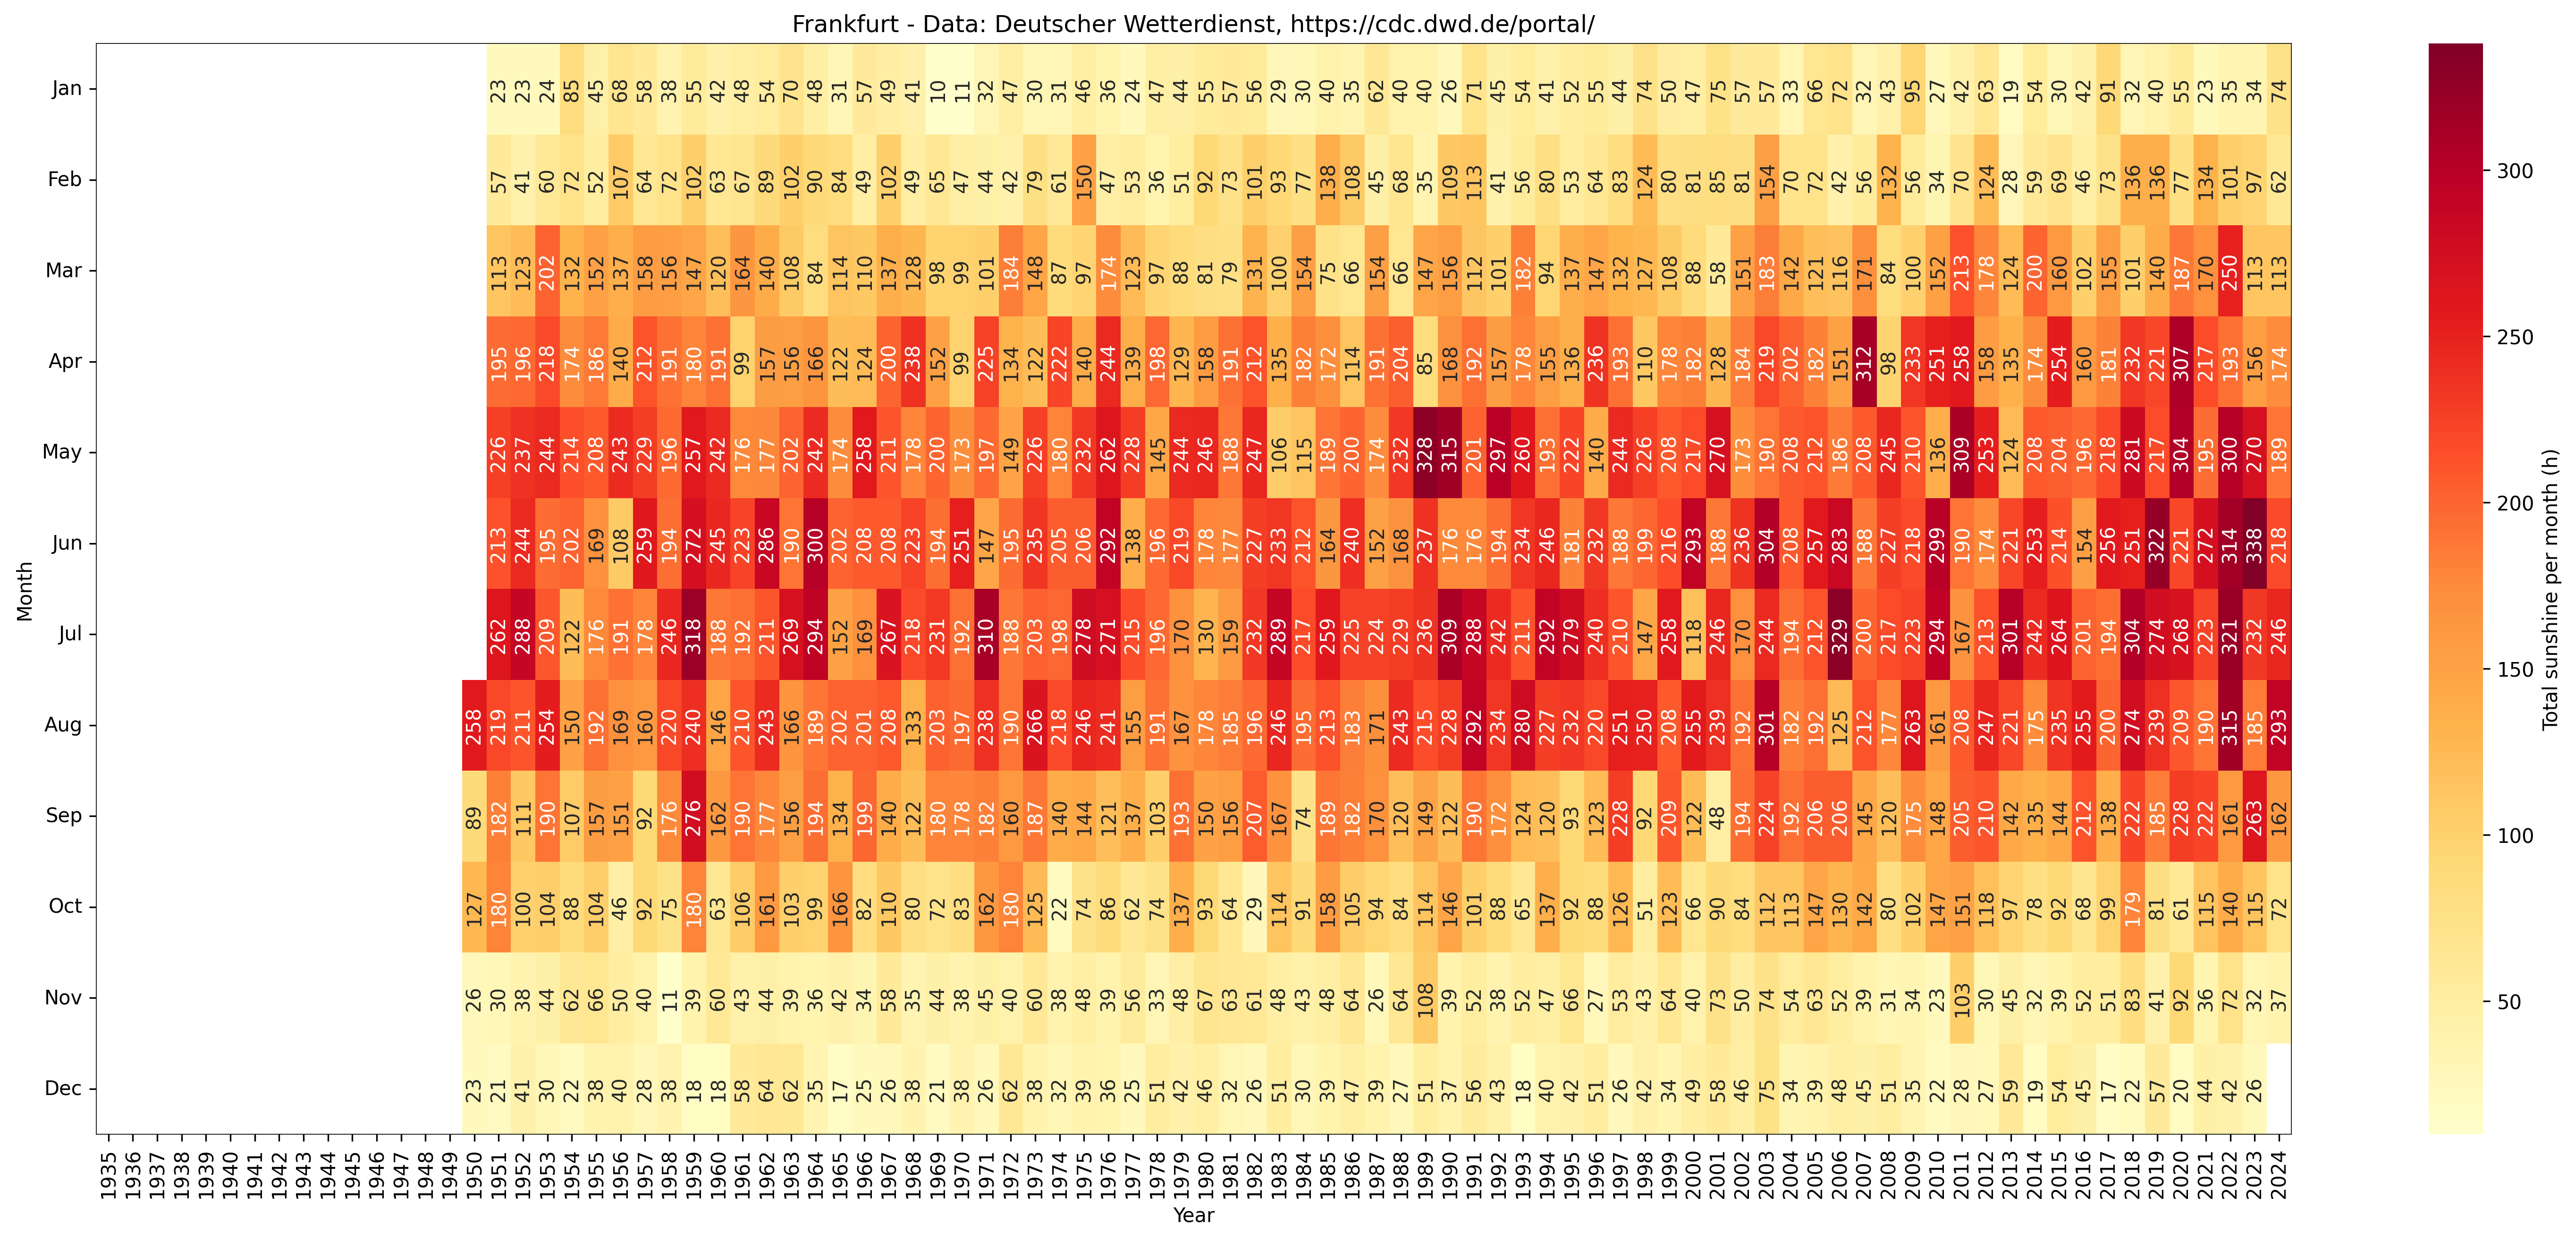

In [12]:
# heatmap monthly mean sunshine
monthlabel = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig = plt.figure(figsize=(25,10),dpi=300)
annot_kws={"fontsize":10, 
           "alpha":1, 
           "rotation":"vertical",
           "verticalalignment":"center"}
ax = sns.heatmap(round(df_pivoted["MO_SD_S"]), annot=True,fmt=".0f",annot_kws = annot_kws,
                cmap="YlOrRd")
ax.collections[0].colorbar.set_label("Total sunshine per month (h)")
# setting the y-axis up side down, i.e. January on top, December in the bottom, to change it to calendar-like format
ax.set_ylim(12,0)
# rotating the x-ticklabels for better visibility
ax.tick_params(axis="x", labelrotation = 90)
# rotating the y-ticklabels 
ax.set_yticks(np.arange(12)+.5, monthlabel,rotation="horizontal")
# 
for spine in ax.spines.values():
        spine.set(visible=True, lw=.4, edgecolor="black")
plt.title(station+" - Data: Deutscher Wetterdienst, https://cdc.dwd.de/portal/")
plt.show()

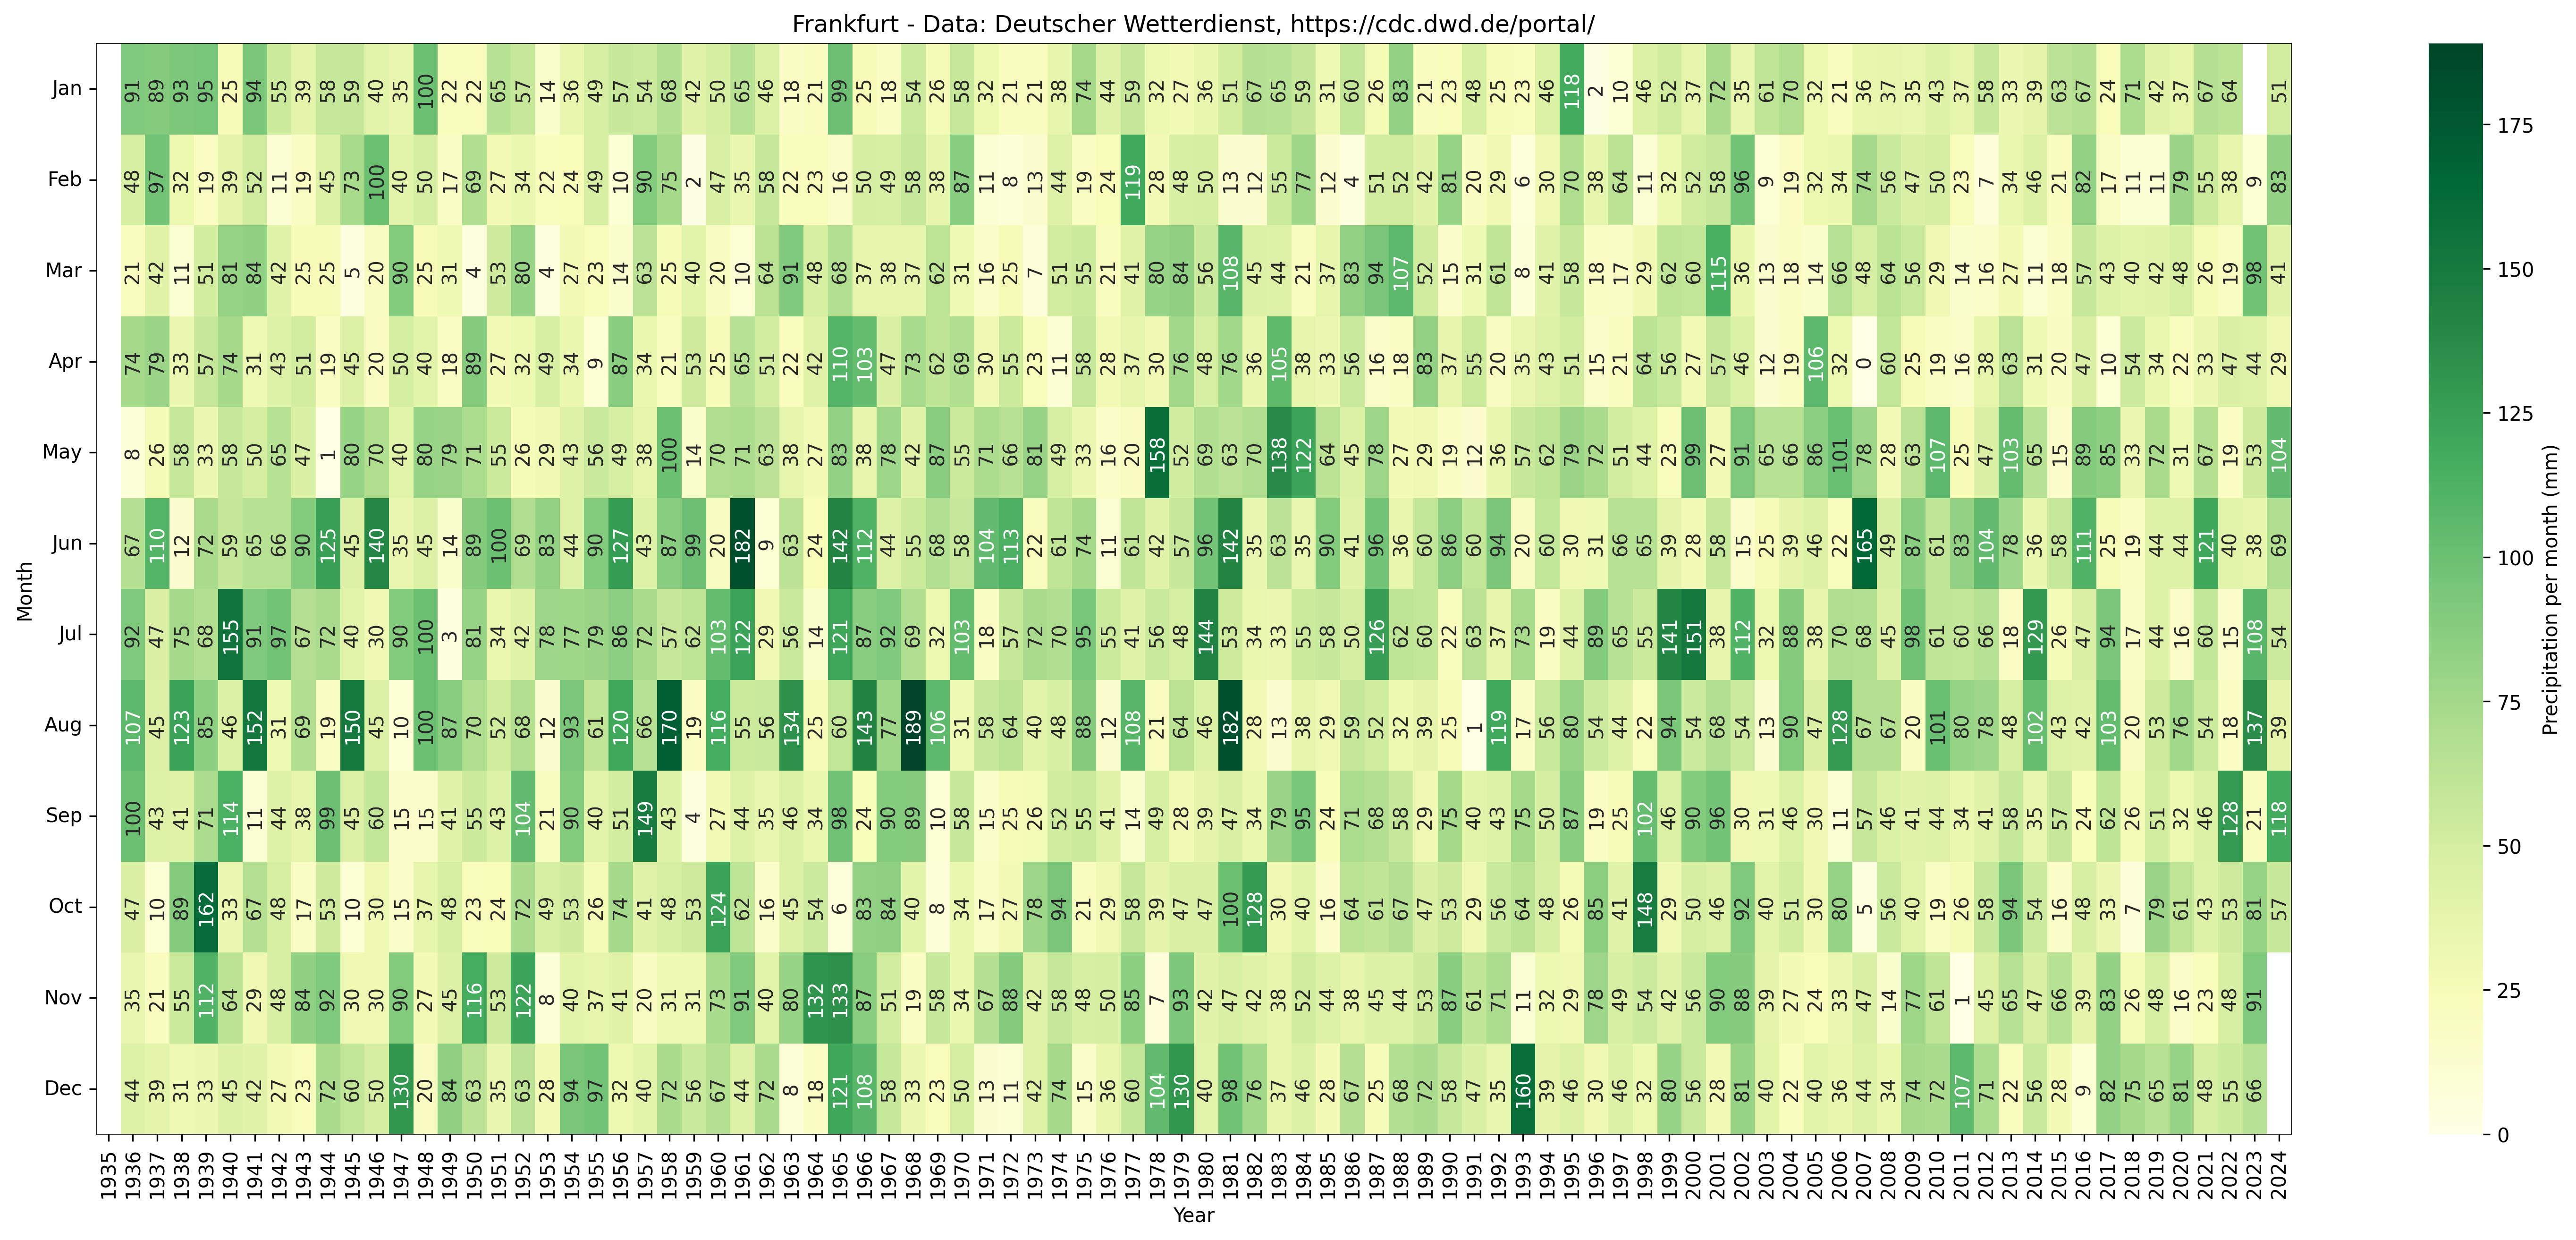

In [13]:
# heatmap monthly mean precipitation
# heatmap monthly mean sunshine
monthlabel = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fig = plt.figure(figsize=(25,10),dpi=300)
annot_kws={"fontsize":10, 
           "alpha":1, 
           "rotation":"vertical",
           "verticalalignment":"center"}
ax = sns.heatmap(round(df_pivoted["MO_RR"]), annot=True,fmt=".0f",annot_kws = annot_kws,
                cmap="YlGn")
ax.collections[0].colorbar.set_label("Precipitation per month (mm)")
# setting the y-axis up side down, i.e. January on top, December in the bottom, to change it to calendar-like format
ax.set_ylim(12,0)
# rotating the x-ticklabels for better visibility
ax.tick_params(axis="x", labelrotation = 90)
# rotating the y-ticklabels 
ax.set_yticks(np.arange(12)+.5, monthlabel,rotation="horizontal")
# 
for spine in ax.spines.values():
        spine.set(visible=True, lw=.4, edgecolor="black")
plt.title(station+" - Data: Deutscher Wetterdienst, https://cdc.dwd.de/portal/")
plt.show()


## 4.2 Monthly average temperature during reference periods

The following plots show the average temperatures per month as time series, the annual average temperatures and the temperatures during the 30-year reference periods. 

For yearly averages, only years with 12 datapoints should be included. In the following cell, years with less than 12 data points are filtered and only complete years are put into a new dataframe (df_complete_TT) to retrieve the mean temperature per year. 


In [14]:

# Count non-NaN values per year in a specific column
year_counts = df.groupby("Year")["MO_TT"].count()

# Find years with exactly 12 non-NaN values
complete_years = year_counts[year_counts == 12].index

# Filter the DataFrame
df_complete_TT = df[df["Year"].isin(complete_years)]


df_year_TT = df_complete_TT.groupby("Year")[["MO_SD_S","MO_RR","MO_N","MO_TT","MO_TN","MO_TX","MX_TX","MX_TN"]].mean()
df_year_TT.index = pd.to_datetime(df_year_TT.index,format="%Y")

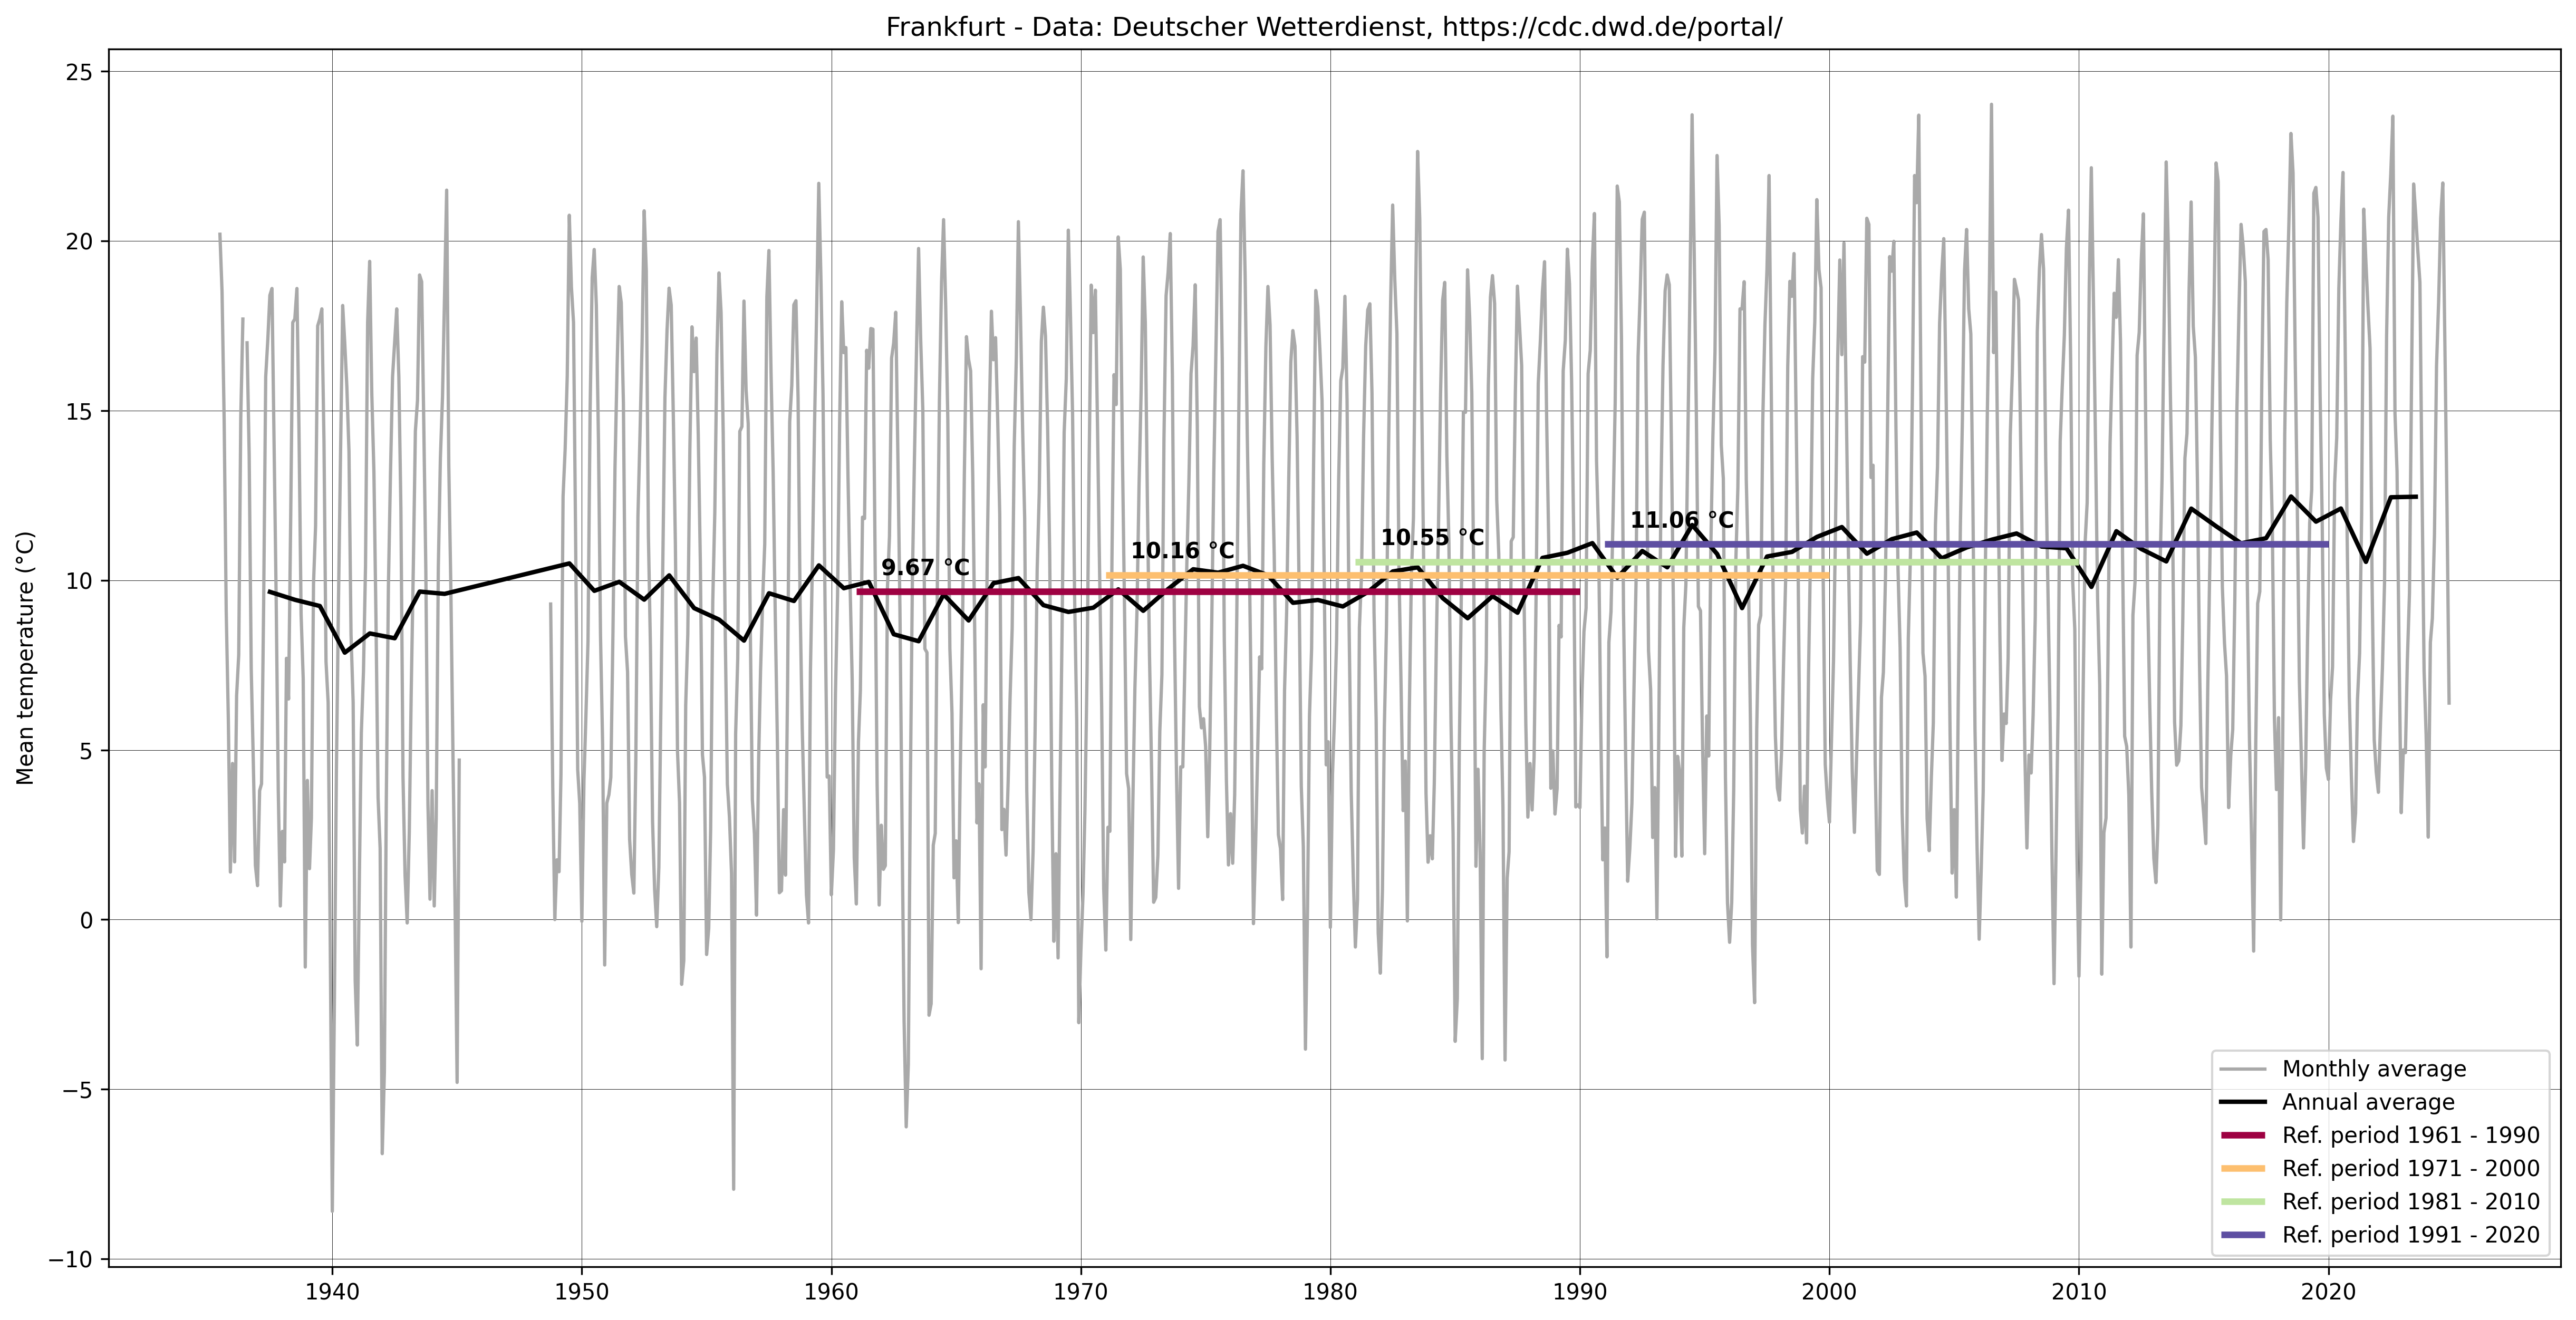

In [15]:
# Plotting all temperature averages, monhtly, annually and the reference periods
# defining the reference periods and colors:
ref_period = [[1961, 1990], [1971, 2000], [1981, 2010], [1991, 2020]]

# Take colors at regular intervals spanning the colormap.
# The amount of colors in the color list is defined by the size of the refernce period list
cmap = plt.colormaps["Spectral"]
colorlist = cmap(np.linspace(0, 1, len(ref_period)))

# plotting:
fig = plt.figure(figsize=(20,10),dpi=300)
ax = fig.add_subplot(111)
# plotting monthly averages from raw data: 
ax.plot(df.index,df["MO_TT"],color="darkgrey",label="Monthly average")
# plotting annual averages, incomplete months are excluded by using the df_year_TT as defined above;
# the x-axis value is shifted by half a year, so that the mean temperature per year aligns with the monthly average
ax.plot(df_year_TT.index + timedelta(days=365/2),df_year_TT["MO_TT"],color="k",linewidth=2,label="Annual average")

# to simplify the plotting, the reference periods are plotted in this loop based on the defined start- and end time of each 30 year period (see above). 
# when another reference should be added, it can simply be defined in the list above by adding or adjusting the start and end year
for colorindex, period in enumerate(ref_period):
    plt.hlines(xmin=pd.to_datetime(str(period[0])),xmax=pd.to_datetime(str(period[1])),
               y=df["MO_TT"].loc[(df["Year"]>=float(str(period[0]))) & (df["Year"]<=float(str(period[1])))].mean(),
              linewidth=3,color=colorlist[colorindex],label="Ref. period " + str(period[0]) + " - " +  str(period[1]))
    # adding the mean temperatures per reference period as text into the plot:
    plt.text(x = pd.to_datetime(str(period[0]))+timedelta(days=365),
             y = df["MO_TT"].loc[(df["Year"] >= period[0]) & (df["Year"] <= period[1])].mean() + 0.5,
             s = str(round(df["MO_TT"].loc[(df["Year"] >= period[0]) & (df["Year"] <= period[1])].mean(),2)) + " \xb0C",
             color="k", rotation="horizontal", fontweight="bold")
ax.set_ylabel("Mean temperature (\xb0C)")
ax.legend()
ax.grid(color = "k", linestyle = "-", linewidth = .2)
plt.title(station+" - Data: Deutscher Wetterdienst, https://cdc.dwd.de/portal/")
plt.show() 

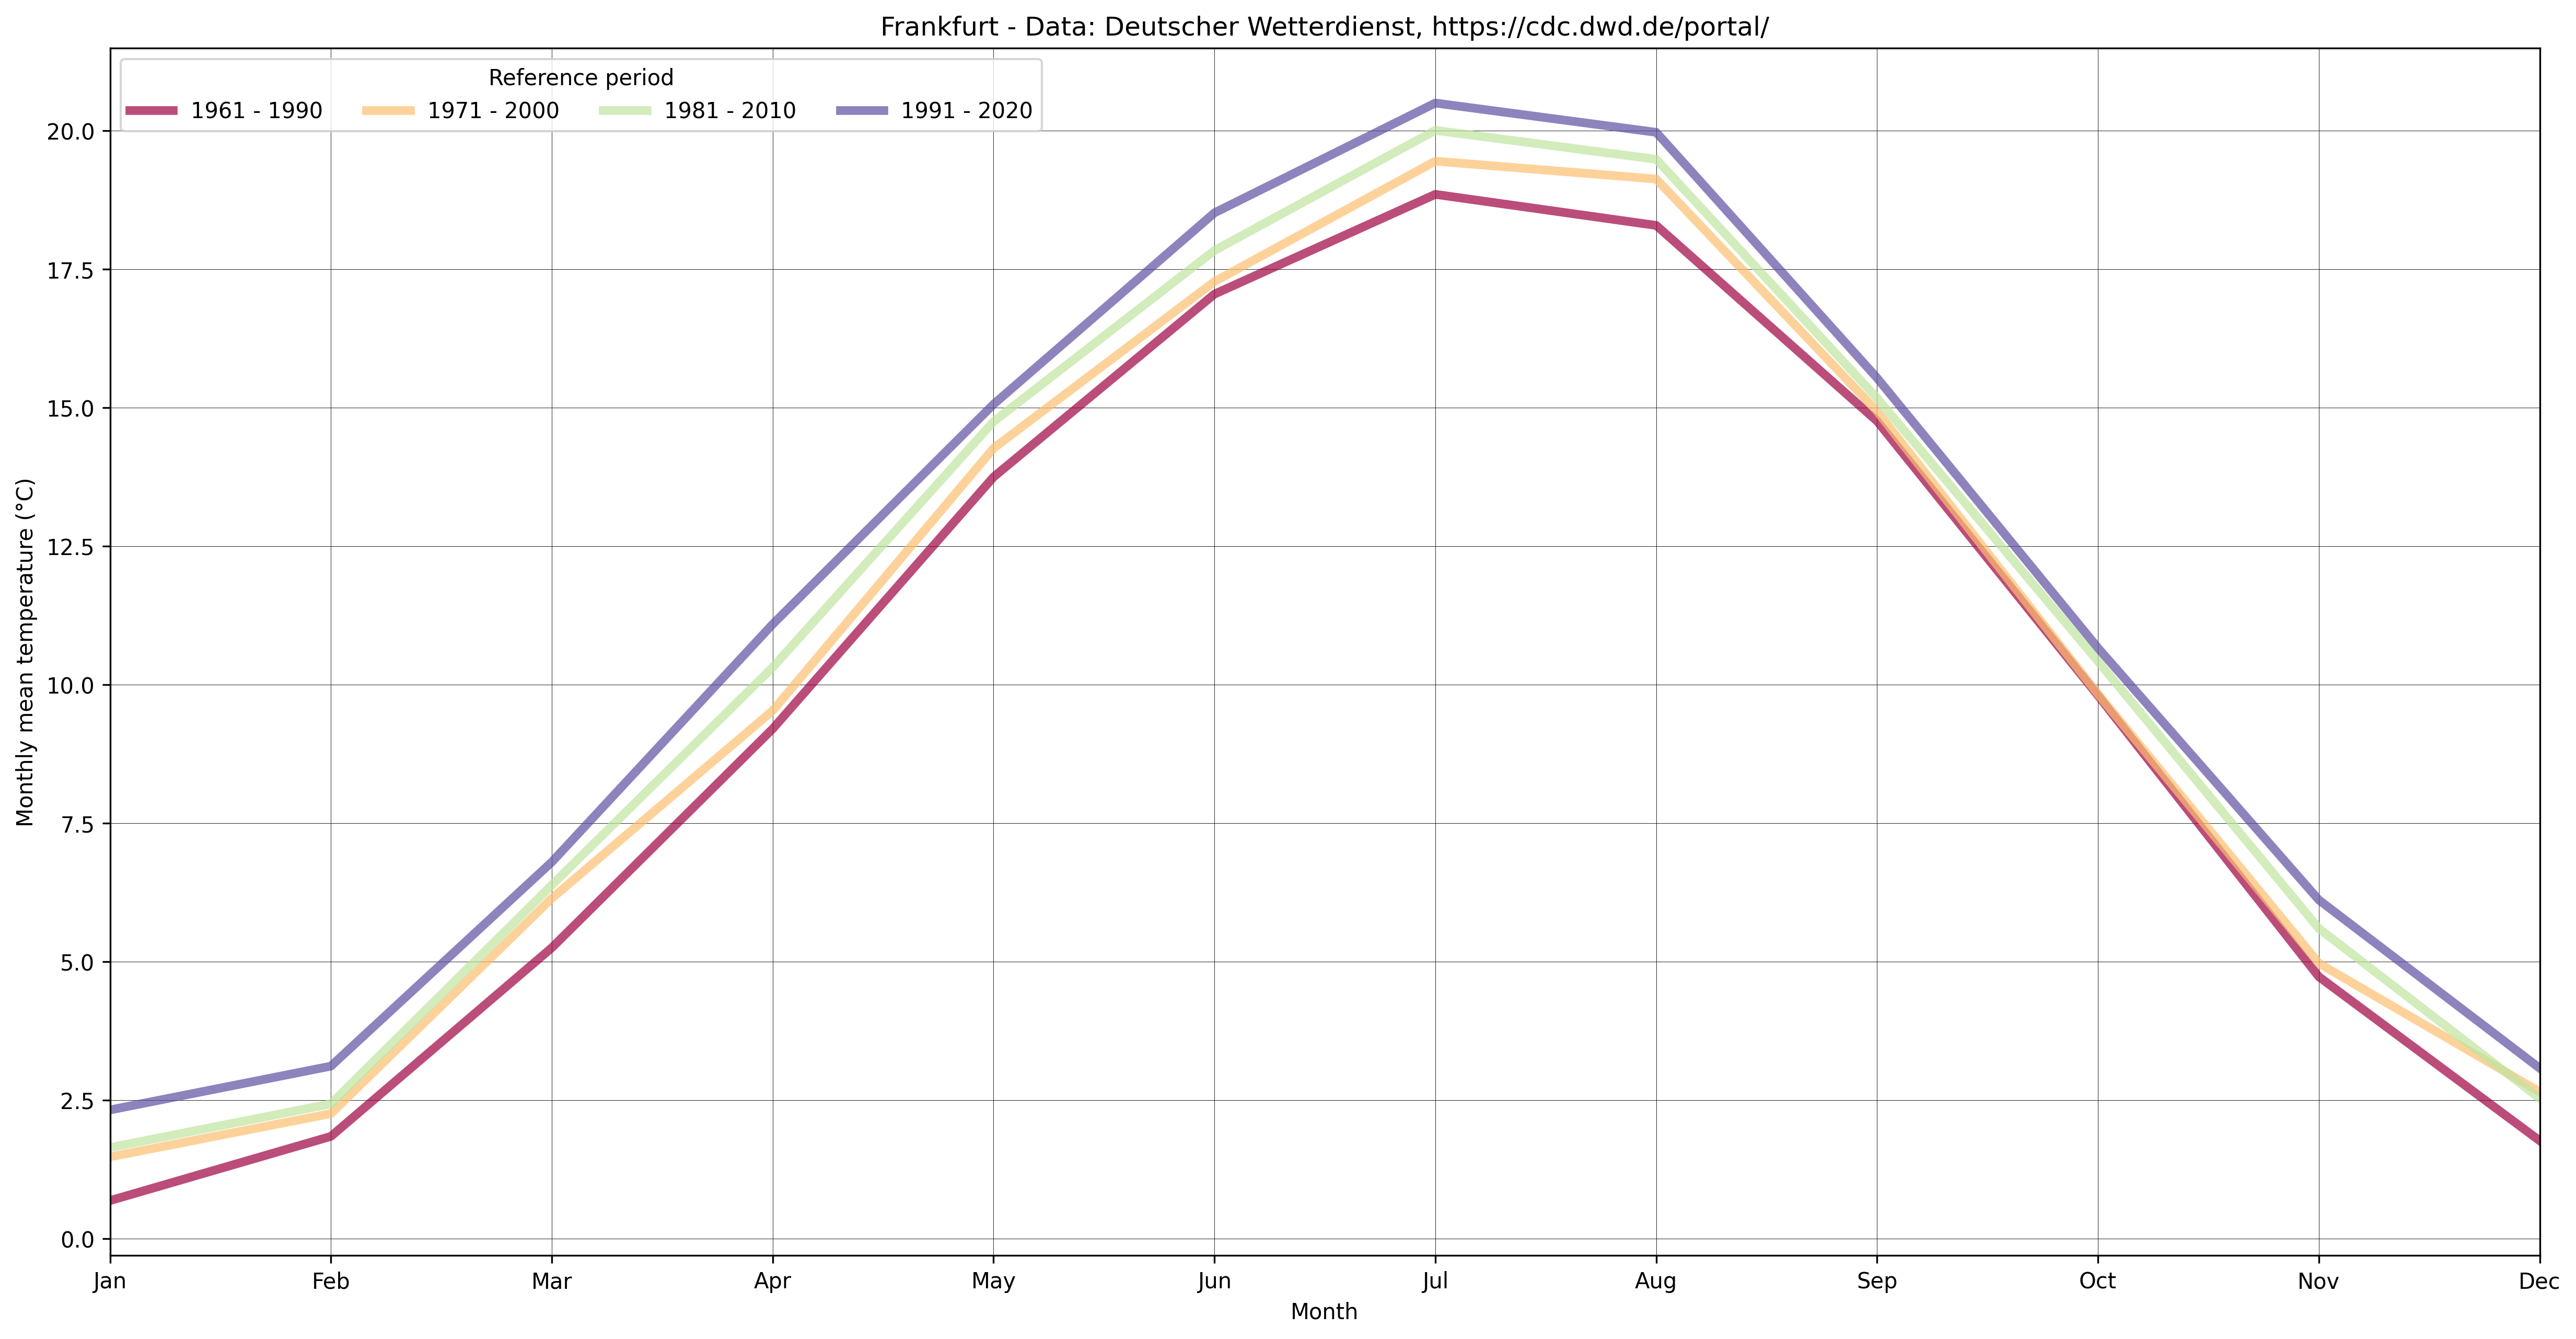

In [16]:
# Plotting the monthly averages of each reference period

xtick_months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# define the reference period: 
ref_period = [[1961, 1990], [1971, 2000], [1981, 2010], [1991, 2020]]

# Take colors at regular intervals spanning the colormap. 
# The amount of colors is defined by the length of the list with the reference periods
cmap = plt.colormaps["Spectral"]
colorlist = cmap(np.linspace(0, 1, len(ref_period)))

# plotting
fig = plt.figure(figsize=(20,10),dpi=300)
ax = fig.add_subplot(111)
# looping through the reference periods and the color list:
for colorindex, period in enumerate(ref_period):
    sns.lineplot(data=df.loc[(df["Year"] >= period[0]) & (df["Year"] <= period[1])], 
                 x = "Month",y="MO_TT",legend="full",errorbar=None,
                 linewidth=4,alpha=.7,label=str(period[0]) + " - " + str(period[1]),
                color=colorlist[colorindex])
ax.grid(color = "k", linestyle = "-", linewidth = .2)
ax.set_ylabel("Monthly mean temperature (\xb0C)")
plt.title(station+" - Data: Deutscher Wetterdienst, https://cdc.dwd.de/portal/")
ax.set_xticks(np.arange(1,13,1),xtick_months)
ax.set_xlim(1,12)
ax.legend(ncol=4,title="Reference period")
plt.show()